# Plotting in Python
In python, like in any programmin language, you can plot graphs. Making high-class graphs of data or simulation results is usually one key component of your published work, be it a thesis, report, or journal-publication.  

There exist a bunch of different plot libraries in python which all serve more or less the same purpose (making your coding visible) but have different utilities.  

One note: Do not use ```pylab``` as suggested by [IPython core developers](link) 


### Pandas
To create a proper dataset for plotting, we use [Pandas](http://pandas.pydata.org/), a high-level library, perfectly suited to handle your data.  
Structuring data or tools to analyse data are just some features of Pandas.

In [1]:
# import some libraries
import numpy as np
import pandas as p

## Load the Dataset
Before we start to analyse the data by inspecting it on a plot, we need to load it so that Python knows, under which _name_ we address the data. We use Pandas for this, as it is well suited for working with structured data. Being built on `numpy`, it is also quite fast.
We'll load a Porosity - Permeability dataset of a (fictitious) Sandstone unit. There are a lot of simplifactions with this porosity and permeability field, mainly that there is no spatial correlation of porosity values. and hence permeability values, as we relate porosity and permeability by a fractal law (see Pape et al., 1999, _Geophysics_ __Vol. 64, No. 5__):  

$$\kappa = 31 \phi + 7463 \phi^2 + 191(10 \phi)^{10}$$

The dataset comprises points in space (x and y coordinates), which store information about porosity and permeability.  
Let's load the dataset using Pandas:  

* x\_[m] and y\_[m] are the coordinates in space in [m] (i.e. distance from a datum)  
* por\_[dec] is porosity 
* logPerm is the logarithm (base 10) of the permeability  

In [2]:
ds = p.read_csv('por_perm.csv') 
ds

,x_[m],y_[m],por_[dec],logperm_[mD]
0,10000,14900,0.13,3.201680e-15
1,4000,7900,0.13,3.201680e-15
2,12900,4100,0.07,4.072250e-17
3,5800,13900,0.25,2.135360e-12
4,7000,2000,0.29,9.215890e-12
5,200,6800,0.17,4.350930e-14
6,7200,4000,0.16,2.708860e-14
7,6200,15000,0.10,3.391590e-16
8,9900,2500,0.20,1.863240e-13
9,2700,6800,0.21,3.850920e-13


In this presentation, we will use x, y, por and logPerm for looking at different kind of plots and plotting libraries.

## Matplotlib 
Matplotlib is undeniably the most used plot library. It comprises a lot of different functions, and you can basically plot everything you like using Matplotlib. In notebooks, it is also possible to use matplotlib with magic functions, namely:
```python
%matplotlib inline
%matplotlib notebook
```  
The key difference is that the `inline` option provides a static plot, while the `notebook` option enables you to pan, zoom, or read data directly from the plot.

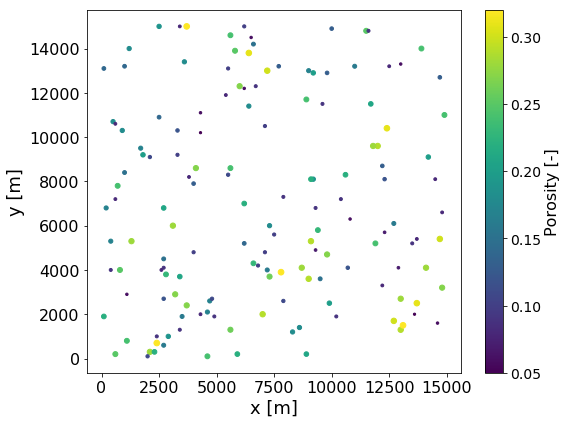

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# a usual way to create adjustable plots inline of notebooks is to create a figure space and add 
# the plot as a subplot
fig = plt.figure(figsize=(8,6))
fig.add_subplot(111)
#a=plt.plot(ds['x_[m]'],ds['y_[m]'],'o',color=(0.9,0.2,0.2),label='porosity')
b = plt.scatter(ds['x_[m]'],ds['y_[m]'],s=ds['por_[dec]']*100,c=ds['por_[dec]'],label='porosity')

# to know the color coding, it is always good to add a colorbar
cbar = fig.colorbar(b, cmap='viridis')

# axes schould always be labeled
plt.xlabel('x [m]',fontsize=18)
plt.ylabel('y [m]',fontsize=18)

#getting the axes ticks in a bigger font is often desireable, for axes, labels..everything
plt.tick_params(axis='both',labelsize=16)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='Porosity [-]',fontsize=16)

plt.tight_layout()

## Bokeh
Bokeh is a stylish interactive plot library, which allows you to chose data within your plot and *grey out* other stuff.  
Its interactive nature is quite similar to using ```%matplotlib notebook``` (btw, try to replace ```inline``` with ```notebook``` in the plot above and see how the figure (-options) change

In [5]:
from bokeh.io import output_notebook, show
from bokeh.charts import Scatter
output_notebook()

Loading BokehJS ...

In [6]:
p = Scatter(ds, x='x_[m]', y='y_[m]', color='por_[dec]', title="Spatial porosity distribution", 
            xlabel="x [m]", ylabel="y [m]")

p.xaxis.axis_line_width = 2
p.yaxis.axis_line_width = 2
show(p)

## Seaborn
Seaborn is another visualization library, and is built on top of `matplotlib`. It provides an interface tailored to generate  aesthetic statistical plots. A more detailed information can be found [here](https://seaborn.pydata.org/) and [here](https://seaborn.pydata.org/introduction.html#introduction).  
A special characteristic of seaborn are pre-built [plot-styles](http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style), such as `darkgrid, whitegrid, dark, white, ticks` etc.  
It also let's you set your plot [context](http://seaborn.pydata.org/generated/seaborn.set_context.html), such as `paper, notebook, talk, poster`

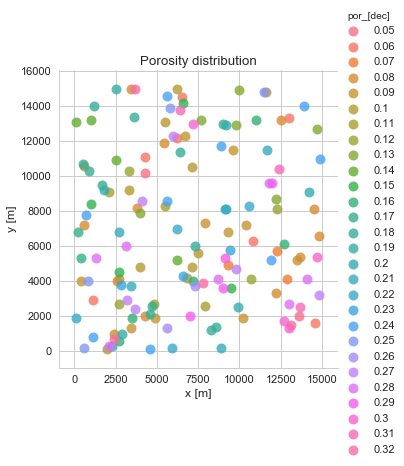

In [9]:
import seaborn as sns
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("whitegrid")

# Create scatterplot of dataframe
sns.lmplot('x_[m]', # column name of x axis
           'y_[m]', # column name of y axis
           data=ds, # Data source, so our Pandas Dataframe
           fit_reg=False, # we do not want to fit a curve
           hue="por_[dec]", # we color by porosity
           scatter_kws={"marker": "D", # marker style
                        "s": 100}) # marker size

# Set title
plt.title('Porosity distribution')

# Set x-axis label
plt.xlabel('x [m]')

# Set y-axis label
plt.ylabel('y [m]')


One benefit of seaborn for example is to have extensive options for histograms, which can be generated rather easy. Let's create histograms for porosity and permeability.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


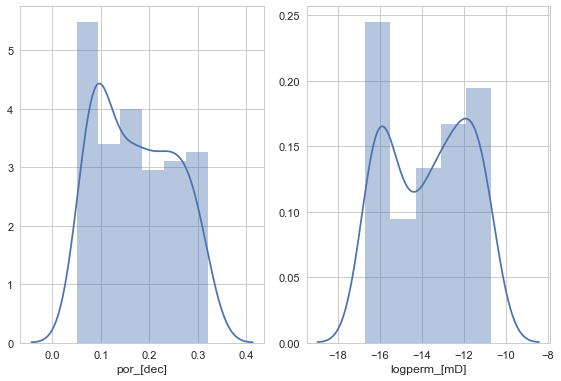

In [13]:
fig, axs = plt.subplots(1,2)
sns.distplot(ds['por_[dec]'], ax = axs[0])
sns.distplot(np.log10(ds['logperm_[mD]']), ax = axs[1])
plt.tight_layout()

## Altair
Altair is somewhat different from the other plot-libraries, as it takes a descriptive approach towards plotting. What does that mean? It will best become clear by showing the plotting code, but let's say:  
If you type "mean x" for your x-axis label, it will directly plot the mean of your x-data.  

Altair is built around the pandas data frame. [Pandas](link) is a nice library to handle data in a csv format.

In [14]:
from altair import *
from IPython.display import display
c = Chart(ds).mark_circle().encode(
    x='x_[m]',
    y='y_[m]',
    color='por_[dec]')

c.display()

## Honorable Mention: Plotly
[Plotly](https://plot.ly/python/) is another interactive plotting library, specialized on sharing your code and your plots online. It heavily uses ```matplotlib.pyplot``` for its features and you can create high class figures with plotly.  
But the main purpose of plotly is to share your plots. It is also available for multiple programming languages, so translating your graphs from one language to another is really simple.
<center>*"__[Plotly is a]__ python plotting library for collaborative, interactive, publication-quality graphs."*</center>  
